# Tutorial #1: Building a Deep Learning Model using Keras and TensorFlow

***Artificial Intelligence in Biomedical Engineering***

Created by: Roser Sala Llonch

February 2024

In this example, we will use [Keras](https://keras.io/), a powerful and easy-to-use Python library for evaluating *Deep Learning* models. It is part of the TensorFlow library.

# 1. Prepare environment and load data

* Use Numpy to load the dataset.
* Use 'Sequential' as a the main Keras model to construct the network.
* Use 'Dense' as the type of predefined layers from Keras.   



In [ ]:
# You can link it to your drive if you have the data there (As I do)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import modules
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

**About the Dataset**
We will use the Pima Indians onset of diabetes dataset. This is a standard machine learning dataset from the [UCI Machine Learning repository](https://archive.ics.uci.edu/).

It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years. It is a binary classification problem (diabetes vs non-diabetes).

All of the input variables that describe each patient are numerical. This makes it easy to use directly with neural networks that expect numerical input and output values and is an ideal choice for our first neural network in Keras.

You can download the CSV dataset [here](https://https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv) (or directly from the repository or Kaggle), don't forget to check the [dataset details](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names).


In [ ]:
# load the dataset (change to your location)
dataset = loadtxt ('/content/drive/MyDrive/AI2024-material/pima-indians.csv', delimiter=',')
# It's just a numpy array, so we can split input (X) and output, or labels (y) by selecting the columns.
X = dataset[:,0:8]
y = dataset[:,8]

According to the dataset information file, the loaded dataset has 8 input variables, sored in a 2D array:
1. Number of times pregnant
2. Plasma glucose concentration at 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

And one output variable
1. Diabetes (0 or 1, no or yes)

# 2. Define Keras Model

As the majority of DL, models are defined as a *sequence* of concatenated layers. We will use the Sequential model from Keras that allows conrolling the characteristics of each layer.


First, we need to make sure that we set the **input_shape** argument correctly. In this case, this will be set to (8,) for presenting the 8 input features as vectors.

Then, we must decide our network architecture, defining the **number of nodes** and the **activation function** for each layer. This is a complex problem as different architectures may led to different results. In a real setting, you should test different networks using a trial-error process or systematic search tools.

Here, we will start with the following network configuration:

*   The first hidden layer has 12 nodes and uses the relu activation function.
*   The second hidden layer has 8 nodes and uses the relu activation function.
*   The output layer has one node and uses the sigmoid activation function.

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**Note**:  Note that the shape of the input is defined as an argument on the first hidden layer. Indeed, this line is doing two things: defining the input or visible layer and the first hidden layer.

# 3. Compile Keras model
The compuler uses numerical libraries such as TensorFlow. This process automatically selects the resources from your hardware (i.e CPU or GPU).



Here, you need to select additional arguments that will be used later, in the trainning process, in concrete, you must select:
* The **loss function** that will be used to evaluate each set of weignts.
* The **optimizer** used to search through different weights of a network.
* Any additional metrics that you want to collect and report during training.  

For this example, we will use cross entropy as the loss argument and an stochastic gradient descent algorithm, called "adam" as an optimizer. Finally, because it is a classification problem, we want to collect "accuracy".

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Now, you can review the model summary:

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Or you can plot it:

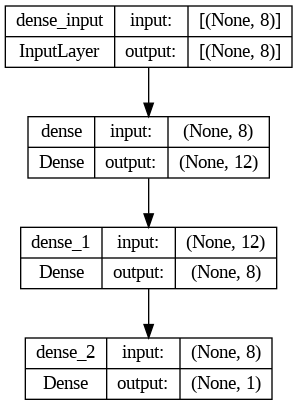

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

#4. Fit the model
Now it's time to fit the model with some data. This is also known as the *training process*.

Training occurs over epochs, and each epoch is split into batches.

* **Epoch**: One pass through all of the rows in the training dataset
* **Batch**: One or more samples considered by the model within an epoch before weights are updated

One epoch comprises one or more batches, based on the chosen batch size, and the model is fit for many epochs.

Thus, you need to specify:

* The **epochs** argument: fixed number of iterations in the training process.
* The **bath_size** argument: number of dataset rows that are considered before the model weights are updated within each epoch.

There is always a **compromise** in setting these configurations.You want to train the model enough so that it learns a good mapping of rows of input data to the output classification, while being cost-efficient.

The model will always have some error, but the amount of error will level out after some point for a given model configuration. This is called **model convergence**.

In [ ]:
# fit the keras model
# here we will 150 epochs (it's a small number for practical reasons) and a batch size of 10.

n_epochs=150
s_batch=10
model.fit(X, y, epochs = n_epochs, batch_size = s_batch)

Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 2.8232 - accuracy: 0.6120
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 1.1248 - accuracy: 0.6107
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8543 - accuracy: 0.6367
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7443 - accuracy: 0.6289
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.6458
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.6536
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.6693
Epoch 8/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.6471
Epoch 9/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6253 - accuracy: 0.6628
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.6419
Epoch 11/

**EXTRA:** You can plot learning curves using the history variable. These will become extremely useful when creating advanced models. See the code example for this below:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


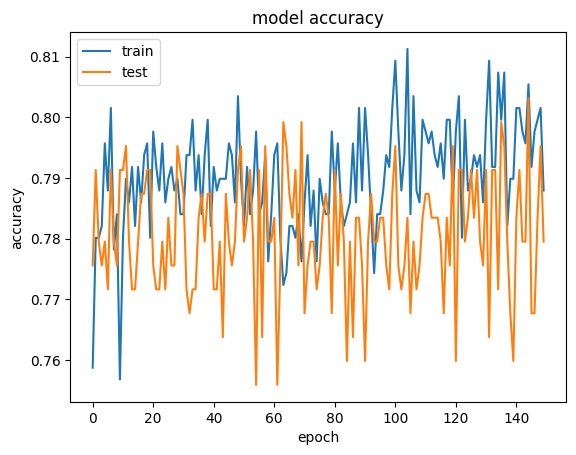

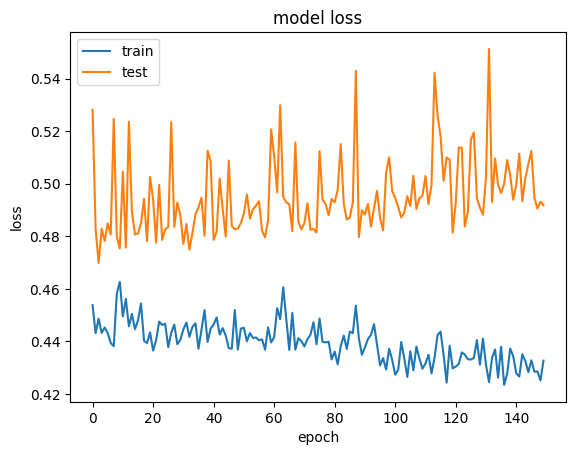

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Fit the model
history = model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#4. Evaluate the model
We can evaluate the performance of the model for a given dataset,



**NOTE:** Here, we have trained the model using the entire dataset and we will evaluate the model using the *same* data. This will give us an idea on ***how good is the model*** but we won't know how the algorithm would perform on new data.

Remember that if you want to evaluate the performance of the model on new sets, you should implement train-test split or cross-validation (see the proposed exercise below).

In [ ]:
# evaluate the keras model
loss, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.7943
Accuracy: 79.43


Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

#5. Get individual predictions
We will see how the model makes guesses about new data. Here, we've used all data for trainning, so we will suppose that each row of the input data are new instances (even if they are NOT).

For this, we will use the 'predict' function fro Keras, with X as an input

In [ ]:
# make probability predictions with the model
predictions = model.predict(X)

24/24 [==============================] - 0s 2ms/step


Now, examine what's inside the 'predictions' vector.

In [ ]:
# place your code here

We can also make ***class predictions*** by assuming that there are only 2 classes (0, 1).

In [ ]:
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)

24/24 [==============================] - 0s 1ms/step


And you can summarize some of the cases

In [ ]:
# summarize the first 5 cases
for i in range(10):
 print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 0 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 1 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 1 (expected 1)


Finally, note that the accuracy of a certain set of input data is calculated based on the previous results.

# EXERCISES:

## Exercise 1:
Try splitting the dataset into test and train. And use both septs separately to train and evaluate the model . You can use sklearn functions for this.

In [ ]:
# PLACE YOR CODE HERE (I recommend you to start the code from scratch)
#
#

## Exercise 2

Try other network configurations, for example by changing the activation functions and/or adding layers to see if you can increase the algorithm accuracy.

In [ ]:
# PLACE YOUR CODE HERE